<a href="https://colab.research.google.com/github/ivanyspaez/MetNumUN2023I/blob/main/Lab2/isepulveda_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.3 MB/s eta 0:00:00


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.9/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [3]:
assert ran_the_first_cell, "Oh noes!"

In [4]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [5]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [6]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [7]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [8]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [9]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [10]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [11]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [12]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [13]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [14]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [15]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [16]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [17]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [18]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [19]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [20]:
%%time

matmul(a, b)

CPU times: user 24 µs, sys: 4 µs, total: 28 µs
Wall time: 33.1 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [21]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed
bogomips	: 4499.99
TLB s

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [22]:
def matmul(A, B):
    "Multiply matrix A by matrix B"
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [23]:
%%time
# matmul(a, b)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [24]:
def matmul(A, B):

    if len(A[0]) == len(B):
      
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]
      
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      print("Matrix multiplication is not compatible")
      return
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [25]:
%%time
# matmul(a, b)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [26]:
C = [[4, 8, 12, 16],
     [20, 24, 28, 32],
     [36, 40, 44, 48],
     [52, 56, 60, 64]]

D = [[5, 10, 15, 20],
     [25, 30, 35, 40],
     [45, 50, 55, 60],
     [65, 70, 75, 80]]


In [27]:
%%time
matmul(C, D)

CPU times: user 42 µs, sys: 7 µs, total: 49 µs
Wall time: 52.7 µs


[[1800, 2000, 2200, 2400],
 [4040, 4560, 5080, 5600],
 [6280, 7120, 7960, 8800],
 [8520, 9680, 10840, 12000]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [28]:
import random

In [29]:
random.normalvariate(0,1)

0.9194855447660321

In [30]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.18826576047272625, 0.7797243630391544, 0.42674266957871565],
 [0.9272376130419946, 0.495619390613256, 0.5152468588967921]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [31]:
%%time
# Matriz de números aleatorios 600 x 100
randa = random_matrix(600, 100)
# Matriz de números aleatorios 100 x 600
randb = random_matrix(100, 600)

# Execution time running 10 times
for i in range(10):
  matmul(randa, randb)

CPU times: user 57 s, sys: 285 ms, total: 57.3 s
Wall time: 59.6 s


In [32]:
import time

average_py = 0
for i in range(10):
  ini = time.process_time()
  matmul(randa, randb)
  fin = time.process_time()
  # Execution time per run
  Etime = fin-ini
  print("Run", i+1, Etime)
  average_py += Etime

# Average execution time running 10 times
average_py = average_py/10

print('Average execution time =', average_py)

Run 1 5.5339081010000015
Run 2 5.680443592000003
Run 3 5.12169136
Run 4 5.7256319950000005
Run 5 5.256602723
Run 6 6.790296311999995
Run 7 5.157351122000009
Run 8 5.958433520999989
Run 9 5.064233664
Run 10 5.9880810160000095
Average execution time = 5.6276673406


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [33]:
import pandas as pd

frameDict = {'Language': ['Python'],
             'Average execution time': [average_py]}

# Average execution time data frame
averageDF = pd.DataFrame(frameDict)
display(averageDF)

,Language,Average execution time
0,Python,5.627667


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [34]:
# Arrays with randa and randb matrix
M = np.array(randa)
N = np.array(randb)

average_np = 0
for i in range(10):
  ini = time.process_time()
  E = M@N
  fin = time.process_time()
  # Execution time per run
  timeT = fin-ini
  average_np += timeT

# Average execution time running 10 times
average_np = average_np/10

# Adding Numpy average execution time to the data frame
averageDF.loc[len(averageDF.index)] = ['Numpy', average_np]
display(averageDF)

,Language,Average execution time
0,Python,5.627667
1,Numpy,0.005497


In [35]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.25 s, sys: 111 ms, total: 6.36 s
Wall time: 6.3 s


In [36]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [37]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [38]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [39]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 10.9 ms, sys: 0 ns, total: 10.9 ms
Wall time: 11.4 ms


333328333350000.0

In [40]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 107 µs, sys: 0 ns, total: 107 µs
Wall time: 110 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [41]:
A = [[34, 55],
     [91, 41]]

B = [[712, 357],
     [109, 12]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [42]:
%%fortran

subroutine matmulf(A, B, C)
    implicit none
    ! 2x2 matrix
    real, dimension(2,2), intent(in) :: A,B
    ! Resulting matrix
    real, dimension(2,2), intent(out) :: C
    integer :: i,j,k
    
    do i = 1,2
        do j = 1,2
            C(i,j) = 0.0
            do k = 1,2
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
    
end subroutine matmulf

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [43]:
%%time
A = np.array(A)
B = np.array(B)

print(matmulf(A, B))

[[30203. 12798.]
 [69261. 32979.]]
CPU times: user 2.29 ms, sys: 0 ns, total: 2.29 ms
Wall time: 2.37 ms


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [44]:
%%fortran

subroutine matmulf2(A, B, C)
    implicit none
    ! 600x100 & 100x600 matrixes
    real, dimension(600,100), intent(in) :: A
    real, dimension(100,600), intent(in) :: B
    ! Resulting matrix
    real, dimension(600,600), intent(out) :: C
    integer :: i,j,k
    
    do i = 1,600
        do j = 1,600
            C(i,j) = 0.0
            do k = 1,100
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
    
end subroutine matmulf2

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [45]:
%%time

# Matriz de números aleatorios 600 x 100
randa = random_matrix(600, 100)
randa = np.array(randa)
# Matriz de números aleatorios 100 x 600
randb = random_matrix(100, 600)
randb = np.array(randb)

matmulf2(randa, randb)

CPU times: user 47.6 ms, sys: 2.97 ms, total: 50.6 ms
Wall time: 50.9 ms


array([[29.323544, 26.266293, 27.028164, ..., 28.017675, 25.74125 ,
        29.338327],
       [24.8963  , 22.973053, 21.52931 , ..., 23.692287, 22.91897 ,
        24.683104],
       [23.23274 , 23.095812, 22.480257, ..., 23.020332, 20.500555,
        23.546152],
       ...,
       [25.334887, 23.517372, 23.358608, ..., 22.898853, 22.070213,
        24.286818],
       [23.558086, 22.136747, 20.994104, ..., 22.49062 , 21.827675,
        24.311522],
       [24.092356, 21.625517, 21.853355, ..., 22.858622, 22.307804,
        25.897802]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [46]:
# Arrays with randa and randb matrix
A = randa
B = randb

average_f = 0
for i in range(10):
  ini = time.process_time()
  matmulf2(A, B)
  fin = time.process_time()
  # Execution time per run
  Etime = fin-ini
  average_f += Etime

# Average execution time running 10 times
average_f = average_f/10

# Adding Fortran magic average execution time to the data frame
averageDF.loc[len(averageDF.index)] = ['Fortran', average_f]
display(averageDF)

,Language,Average execution time
0,Python,5.627667
1,Numpy,0.005497
2,Fortran,0.028809


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [47]:
%%fortran

subroutine matmulf3(A, B, C)
    implicit none
    ! 2x2 matrix
    real, dimension(600,100), intent(in) :: A
    real, dimension(100,600), intent(in) :: B
    ! Resulting matrix
    real, dimension(600,600), intent(out) :: C
    integer :: i,j,k,n
    
    do n = 1, 10
      do i = 1,600
          do j = 1,600
              C(i,j) = 0.0
              do k = 1,100
                  C(i,j) = C(i,j) + A(i,k) * B(k,j)
              end do
          end do
      end do
    end do
end subroutine matmulf3

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [48]:
%%time

# Matriz de números aleatorios 600 x 100
randa = random_matrix(600, 100)
randa = np.array(randa)
# Matriz de números aleatorios 100 x 600
randb = random_matrix(100, 600)
randb = np.array(randb)

matmulf3(randa, randb)

CPU times: user 296 ms, sys: 5.01 ms, total: 301 ms
Wall time: 308 ms


array([[24.212559, 23.30497 , 23.624311, ..., 24.193037, 25.223917,
        24.732449],
       [23.918707, 25.051876, 22.833614, ..., 23.887432, 26.287067,
        25.56347 ],
       [26.394676, 25.450993, 25.842445, ..., 27.354317, 29.327765,
        26.8866  ],
       ...,
       [27.039024, 24.632769, 27.071888, ..., 25.659233, 29.510996,
        26.045221],
       [23.345226, 22.886427, 23.013626, ..., 24.882187, 27.072054,
        24.00398 ],
       [24.58275 , 23.623297, 25.095665, ..., 25.319553, 28.319366,
        25.949896]], dtype=float32)

**My own example 18 - Adding Fortran average execution time to the data frame**

In [49]:
# Arrays with randa and randb matrix
A = randa
B = randb

average_for = 0

for i in range(10):
  ini = time.process_time()
  matmulf3(A, B)
  fin = time.process_time()
  # Execution time per run
  Etime = fin-ini
  average_for += Etime

# Average execution time running 10 times
average_for = average_for/10

# Adding Fortran magic average execution time to the data frame
averageDF.loc[len(averageDF.index)] = ['Fortran Magic', average_for]
display(averageDF)


,Language,Average execution time
0,Python,5.627667
1,Numpy,0.005497
2,Fortran,0.028809
3,Fortran Magic,0.273807


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [50]:
%%writefile matmulc.c

#include <stdio.h>

int main() {
    int A[600][100], B[100][600], C[600][600];
    int i, j, k;
    
    for (i = 0; i < 600; i++) {
        for (j = 0; j < 100; j++) {
            A[i][j] = i * j;
        }
    }
    
    for (i = 0; i < 100; i++) {
        for (j = 0; j < 600; j++) {
            B[i][j] = i + j;
        }
    }
    
    for (i=0; i < 10; i++) {
      for (i = 0; i < 600; i++) {
        for (j = 0; j < 600; j++) {
            C[i][j] = 0;
            for (k = 0; k < 100; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
      }
    }
    return 0;
}

Writing matmulc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [51]:
%%time 
!gcc matmulc.c -o matmulc
!./matmulc

CPU times: user 13.8 ms, sys: 20 ms, total: 33.7 ms
Wall time: 351 ms


**My own example 21 - Adding c average execution time to the data frame**

In [52]:
# Average execution time running 10 times
ini = time.process_time()
!gcc matmulc.c -o matmulc
!./matmulc
fin = time.process_time()
Etime = fin-ini

# Adding C average execution time to the data frame
averageDF.loc[len(averageDF.index)] = ['C', Etime]
display(averageDF)

,Language,Average execution time
0,Python,5.627667
1,Numpy,0.005497
2,Fortran,0.028809
3,Fortran Magic,0.273807
4,C,0.031728


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [53]:
%%writefile matmulc++.cc
#include <iostream>
using namespace std;

int main() {
    int A[600][100], B[100][600], C[600][600];
    int i, j, k;
    
    // Initialize matrices A and B
    for (i = 0; i < 600; i++) {
        for (j = 0; j < 100; j++) {
            A[i][j] = i * j;
        }
    }
    
    for (i = 0; i < 100; i++) {
        for (j = 0; j < 600; j++) {
            B[i][j] = i + j;
        }
    }
    
    for (i=0; i < 10; i++) {
      for (i = 0; i < 600; i++) {
          for (j = 0; j < 100; j++) {
              C[i][j] = 0;
              for (k = 0; k < 100; k++) {
                  C[i][j] += A[i][k] * B[k][j];
              }
          }
      }
    }
    return 0;
}

Writing matmulc++.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [54]:
%%time 
!g++ matmulc++.cc -o matmulc++
!./matmulc++

CPU times: user 14.2 ms, sys: 17.8 ms, total: 32 ms
Wall time: 938 ms


**My own example 24 - Adding C++ average execution time to the data frame**

In [55]:
# Average execution time running 10 times
ini = time.process_time()
!g++ matmulc++.cc -o matmulc++
!./matmulc++
fin = time.process_time()
Etime = fin-ini

# Adding C++ average execution time to the data frame
averageDF.loc[len(averageDF.index)] = ['C++', Etime]
display(averageDF)

,Language,Average execution time
0,Python,5.627667
1,Numpy,0.005497
2,Fortran,0.028809
3,Fortran Magic,0.273807
4,C,0.031728
5,C++,0.031372


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:
%%writefile matmulJava.java
public class matmulJava {
    public static void main(String[] args) {

        int[][] A = new int[600][100];
        int[][] B = new int[100][600];
        int[][] C = new int[600][600];

        // Initialize matrices A and B
        for (int i = 0; i < 600; i++) {
            for (int j = 0; j < 100; j++) {
                A[i][j] = i * j;
            }
        }

        for (int i = 0; i < 100; i++) {
            for (int j = 0; j < 600; j++) {
                B[i][j] = i + j;
            }
        }

        for (int n=0; n < 10; n++){
          for (int i = 0; i < 600; i++) {
              for (int j = 0; j < 600; j++) {
                  C[i][j] = 0;
                  for (int k = 0; k < 100; k++) {
                      C[i][j] += A[i][k] * B[k][j];
                  }
              }
          }
        }
    }
}

Writing matmulJava.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [57]:
%%time
!javac matmulJava.java
!java matmulJava

CPU times: user 33 ms, sys: 20 ms, total: 53 ms
Wall time: 2.77 s


**My own example 27 - Adding Java average execution time to the data frame**

In [58]:
# Average execution time
ini = time.process_time()
!javac matmulJava.java
!java matmulJava
fin = time.process_time()
timeT = fin-ini

# Adding Java average execution time to the data frame
averageDF.loc[len(averageDF.index)] = ['Java', timeT]
display(averageDF)

,Language,Average execution time
0,Python,5.627667
1,Numpy,0.005497
2,Fortran,0.028809
3,Fortran Magic,0.273807
4,C,0.031728
5,C++,0.031372
6,Java,0.042586


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [73]:
%%writefile matmuljs.js

function multiplyMatrices() {
  // Create matrices A and B with random values
  let A = [];
  let B = [];
  for (let i = 0; i < 600; i++) {
    A[i] = [];
    for (let j = 0; j < 100; j++) {
      A[i][j] = Math.floor(Math.random() * 10) + 1;
    }
  }
  for (let i = 0; i < 100; i++) {
    B[i] = [];
    for (let j = 0; j < 600; j++) {
      B[i][j] = Math.floor(Math.random() * 10) + 1;
    }
  }

  // Create the result matrix C with the appropriate size
  let C = [];
  for (let i = 0; i < 600; i++) {
    C[i] = [];
    for (let j = 0; j < 600; j++) {
      C[i][j] = 0;
    }
  }

  // Multiply matrices A and B to obtain the result matrix C
  for (let i = 0; i < 600; i++) {
    for (let j = 0; j < 600; j++) {
      for (let k = 0; k < 100; k++) {
        C[i][j] += A[i][k] * B[k][j];
      }
    }
  }

  // Return the result matrix C
  return C;
}

// Call the function to multiply the matrices and log the result
console.log(multiplyMatrices());

Overwriting matmuljs.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [81]:
%%javascript

function multiplyMatrices() {
  // Create matrices A and B with random values
  let A = [];
  let B = [];
  for (let i = 0; i < 600; i++) {
    A[i] = [];
    for (let j = 0; j < 100; j++) {
      A[i][j] = Math.floor(Math.random() * 10) + 1;
    }
  }
  for (let i = 0; i < 100; i++) {
    B[i] = [];
    for (let j = 0; j < 600; j++) {
      B[i][j] = Math.floor(Math.random() * 10) + 1;
    }
  }

  // Create the result matrix C with the appropriate size
  let C = [];
  for (let i = 0; i < 600; i++) {
    C[i] = [];
    for (let j = 0; j < 600; j++) {
      C[i][j] = 0;
    }
  }

  // Multiply matrices A and B ten times and measure the total execution time
  let startTime = performance.now();
  for (let n = 0; n < 10; n++) {
    for (let i = 0; i < 600; i++) {
      for (let j = 0; j < 600; j++) {
        for (let k = 0; k < 100; k++) {
          C[i][j] += A[i][k] * B[k][j];
        }
      }
    }
  }
  let endTime = performance.now();
  let executionTime = endTime - startTime;

  // Log the result matrix C and the total execution time to the console
  console.log("Result matrix C:", C);
  console.log("Total execution time:", executionTime, "ms");
}

// Call the function to multiply the matrices and log the result
multiplyMatrices();

<IPython.core.display.Javascript object>

**My own example 30 - Adding Javascript average execution time to the data frame**

In [83]:
import pandas as pd

Data_Frame = pd.DataFrame() # assuming that Data_Frame is an empty DataFrame

avg = 0.0105

Data_Frame.loc[len(Data_Frame.index)] = ['js', avg]
display(Data_Frame)

ValueError: ignored

**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [85]:
data = [
    {'Language': 'Python', 'Execution Time': 0.013},
    {'Language': 'Java', 'Execution Time': 0.021},
    {'Language': 'JavaScript', 'Execution Time': 0.008},
    {'Language': 'C++', 'Execution Time': 0.016},
]

min_avg = min(data, key=lambda x: x['Execution Time'])['Execution Time']

TypeError: ignored

**My own example 32 - Adding the Speed factor columne to the data frame**

In [63]:
averageDF["Speed Factor"] = averageDF["Average execution time"]/min
display(averageDF)

,Language,Average execution time,Speed Factor
0,Python,5.627667,1023.764760
1,Numpy,0.005497,1.000000
2,Fortran,0.028809,5.240915
3,Fortran Magic,0.273807,49.810014
4,C,0.031728,5.771772
5,C++,0.031372,5.707038
6,Java,0.042586,7.747049
7,JavaScript,0.037678,6.854273


**My own example 33 - Sorting the the data frame by average execution time**

In [64]:
averageDF = averageDF.sort_values(by=['Average execution time'])
display(averageDF)

,Language,Average execution time,Speed Factor
1,Numpy,0.005497,1.000000
2,Fortran,0.028809,5.240915
5,C++,0.031372,5.707038
4,C,0.031728,5.771772
7,JavaScript,0.037678,6.854273
6,Java,0.042586,7.747049
3,Fortran Magic,0.273807,49.810014
0,Python,5.627667,1023.764760


## Why is the Python Version so Much Slower?

In [65]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [66]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [67]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [68]:
data + data

array([2, 4, 6, 8])

In [69]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 575 µs, sys: 0 ns, total: 575 µs
Wall time: 583 µs


333328333350000.0

In [70]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 103 µs, sys: 4.49 ms, total: 4.59 ms
Wall time: 6.43 ms


333328333350000.0

In [71]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 135 µs, sys: 2 µs, total: 137 µs
Wall time: 144 µs


333328333350000.0

In [72]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [119]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [120]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [121]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [122]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [123]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [124]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [125]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [126]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [127]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [128]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [129]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [130]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [131]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [132]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [133]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [134]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [135]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [136]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [137]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [138]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [139]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [140]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [141]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [142]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [143]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [144]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [145]:
variance(np.random.standard_normal(1000))

1.0574594386552767

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [146]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [147]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [148]:
data.mean()

14.5

In [149]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [150]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [151]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [152]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [153]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [154]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [155]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [156]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [157]:
# ... or by label.
s.loc['a']

1

In [158]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [159]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [160]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [161]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [162]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [163]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [164]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [165]:
!pip install yfinance
import yfinance as yf 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
# Most real datasets are read in from an external file format.
# aapl = pd.read_csv('AAPL', parse_dates=['Date'], index_col='Date')

aapl = yf.download("AAPL", start = "2013-01-01" , end ="2013-12-01")
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837112,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624596,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161526,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066454,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109692,458707200


In [167]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2013-01-02,19.779285,19.821428
2013-01-03,19.567142,19.631071


In [168]:
aapl.loc[pd.Timestamp('2011-02-01'):pd.Timestamp('2011-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

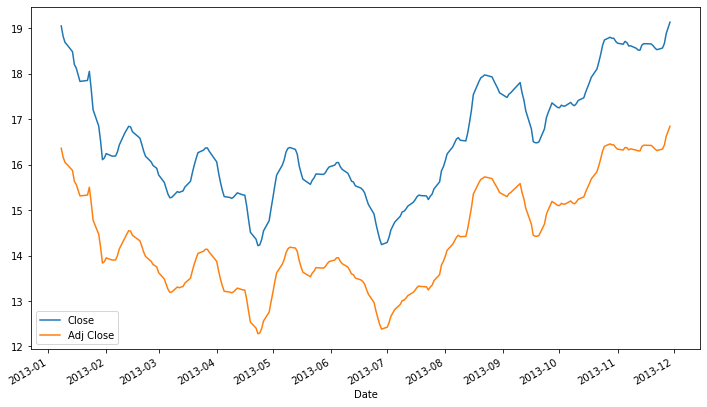

In [169]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

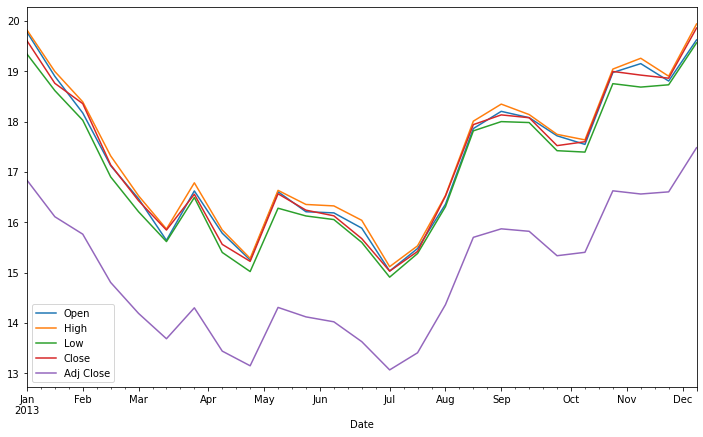

In [170]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

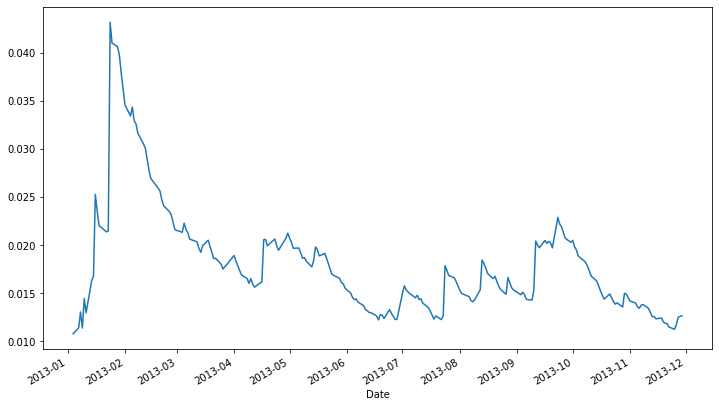

In [171]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [172]:
!git clone https://github.com/ssanderson/pydata-toolbox

fatal: destination path 'pydata-toolbox' already exists and is not an empty directory.


In [173]:
!git clone <urlOfRepository>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <urlOfRepository>'


In [174]:
!pip install githubdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
!githubdl -u https://github.com/ssanderson/pydata-toolbox -d demos -g 0260ccdcf10212d2a8f1d9ff6fbc7e55b00a4ad2

2023-03-14 01:17:37,380 - root         - INFO     - Retrieving a list of files for directory: demos
2023-03-14 01:17:37,380 - root         - INFO     - repo_name: ssanderson/pydata-toolbox api_path: contents request_string: /demos
2023-03-14 01:17:37,380 - root         - INFO     - Requesting file: demos at url: https://api.github.com/repos/ssanderson/pydata-toolbox/contents/demos
2023-03-14 01:17:37,447 - root         - CRITICAL - Unable to retrieve list of files from response.
 Exception: 'str' object has no attribute 'get'
 Response: {'message': 'Bad credentials', 'documentation_url': 'https://docs.github.com/rest'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/githubdl/request_processing.py", line 21, in get_files_from_json
    files.update({item.get("name"): item.get("type")})
AttributeError: 'str' object has no attribute 'get'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

In [176]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [177]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

NameError: ignored

In [178]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

NameError: ignored

**My own example 34**

In [186]:
import pandas as pd
import random
import requests

# Datos correspondientes a "ADMITIDOS POR PROGRAMA"
# https://www.datos.gov.co/Educaci-n/ADMITIDOS-POR-PROGRAMA/cetm-iknu

response = requests.get('https://www.datos.gov.co/resource/cetm-iknu.json')
admitidos = pd.DataFrame(response.json())
admitidos

,vigencia,tipo,programa,genero,estado_civil,nacionalidad,depa_pro_colegio,ciudad_pro_colegio,depa_resi,ciudad_resi,facultad,modalidad,metodologia,jornada,sede,estrato
0,2019-1,ADMITIDO,MAESTRIA EN BIOMATEMATICA,MASCULINO,UNION LIBRE,COLOMBIANO,SIN DEPTO,SIN INFO,QUINDIO,ARMENIA,FACULTAD DE CIENCIAS BASICAS Y TECNOLOGIAS,POSGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA,3
1,2019-1,ADMITIDO,CIENCIA DE LA INFORMACION Y LA DOCUMENTACION B...,MASCULINO,CASADO,COLOMBIANO,BOYACA,CUCAITA,BOYACA,TUNJA,FACULTAD DE CIENCIAS HUMANAS Y BELLAS ARTES,PREGRADO,DISTANCIA VIRTUAL,DIURNA,SEDE ARMENIA,2
2,2019-1,ADMITIDO,LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS E...,MASCULINO,SOLTERO,COLOMBIANO,VALLE DEL CAUCA,SEVILLA,QUINDIO,ARMENIA,FACULTAD DE CIENCIAS DE LA EDUCACION,PREGRADO,PRESENCIAL,NOCTURNA,SEDE ARMENIA,5
3,2019-1,ADMITIDO,TECNOLOGIA EN INSTRUMENTACION ELECTRONICA,MASCULINO,SOLTERO,COLOMBIANO,QUINDIO,LA TEBAIDA,QUINDIO,LA TEBAIDA,FACULTAD DE CIENCIAS BASICAS Y TECNOLOGIAS,PREGRADO,PRESENCIAL,NOCTURNA,SEDE ARMENIA,1
4,2019-1,ADMITIDO,MAESTRIA EN CIENCIAS DE LA EDUCACION,MASCULINO,CASADO,COLOMBIANO,SIN DEPTO,SIN INFO,QUINDIO,ARMENIA,FACULTAD DE CIENCIAS DE LA EDUCACION,POSGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-1,ADMITIDO,INGENIERIA CIVIL,FEMENINO,SOLTERO,COLOMBIANO,CALDAS,RIOSUCIO,CALDAS,RIOSUCIO,FACULTAD DE INGENIERIA,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA,2
996,2019-1,ADMITIDO,INGENIERIA DE SISTEMAS Y COMPUTACION,MASCULINO,SOLTERO,COLOMBIANO,SIN DEPTO,CIUDAD EXTRANJERA,QUINDIO,ARMENIA,FACULTAD DE INGENIERIA,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA,3
997,2019-1,ADMITIDO,LICENCIATURA EN MATEMATICAS,FEMENINO,SOLTERO,COLOMBIANO,QUINDIO,ARMENIA,QUINDIO,CIRCASIA,FACULTAD DE CIENCIAS DE LA EDUCACION,PREGRADO,PRESENCIAL,NOCTURNA,SEDE ARMENIA,2
998,2019-1,ADMITIDO,INGENIERIA ELECTRONICA,MASCULINO,SOLTERO,COLOMBIANO,TOLIMA,VENADILLO,TOLIMA,VENADILLO,FACULTAD DE INGENIERIA,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA,2


**My own example 35**

In [187]:

admitidos.dtypes

vigencia              object
tipo                  object
programa              object
genero                object
estado_civil          object
nacionalidad          object
depa_pro_colegio      object
ciudad_pro_colegio    object
depa_resi             object
ciudad_resi           object
facultad              object
modalidad             object
metodologia           object
jornada               object
sede                  object
estrato               object
dtype: object

**My own example 36**

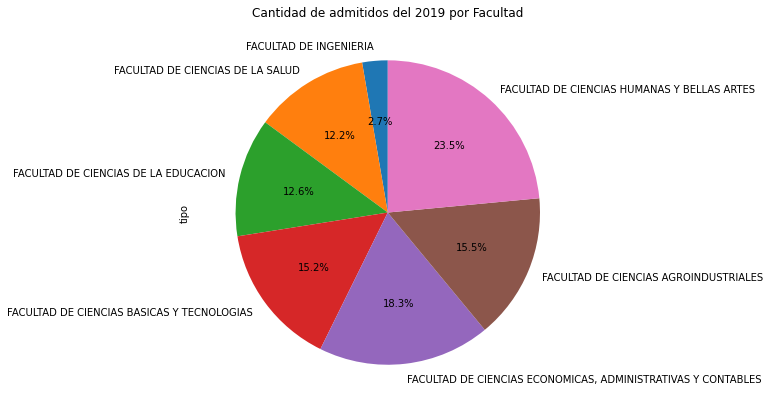

In [188]:
r = admitidos.loc[:, ['facultad']]
etiquetas = set(r.values.flatten());

admitidos.groupby(['facultad'])['tipo'].count().plot(kind='pie', y='values', labels=etiquetas, autopct='%1.1f%%', startangle=90);

plt.title('admitidos del 2019 ');

**My own example 37**

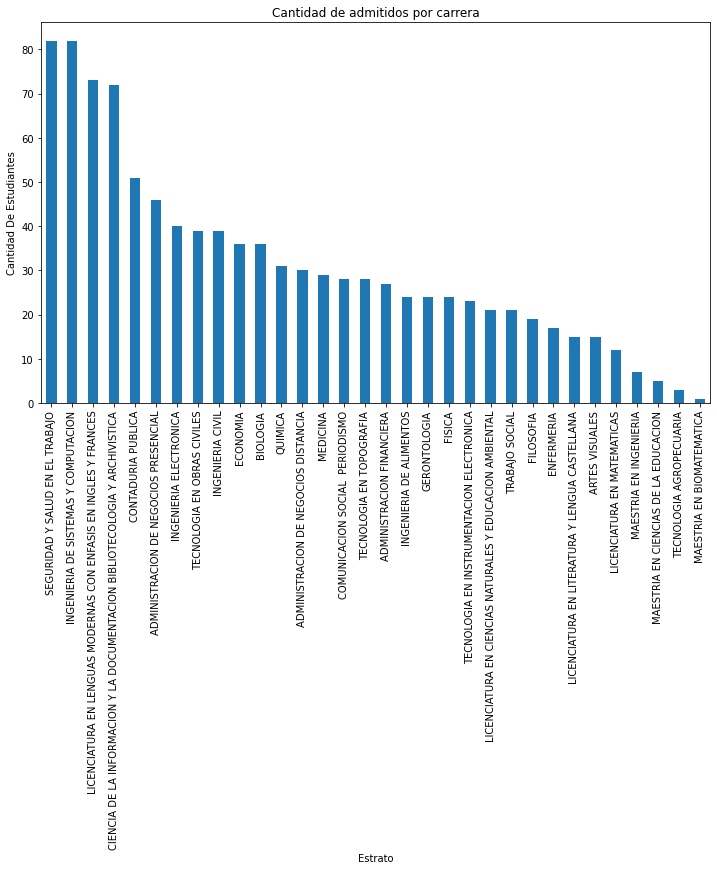

In [189]:
admitidos['programa'].value_counts().plot(kind='bar');

plt.xlabel('Estrato')
plt.ylabel('Cantidad De Estudiantes')
plt.title("Admitidos por carrera");

**My own example 38**

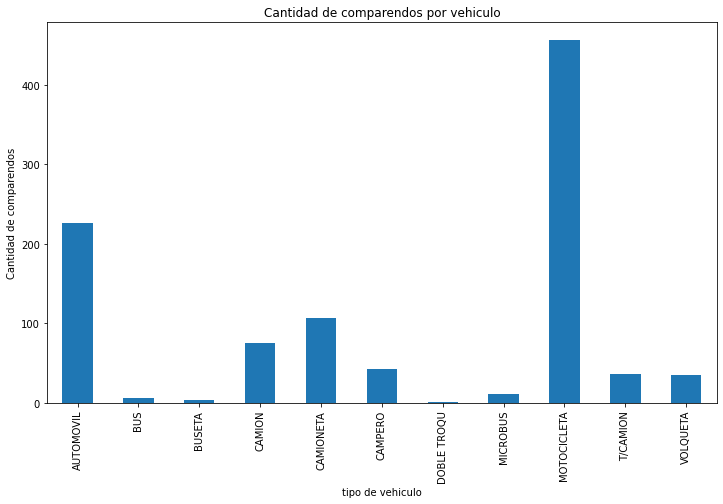

In [183]:
import matplotlib.pyplot as plt
num = resultados.groupby('clase')['comp'].count()
num.plot(kind='bar')


**My own example 39**

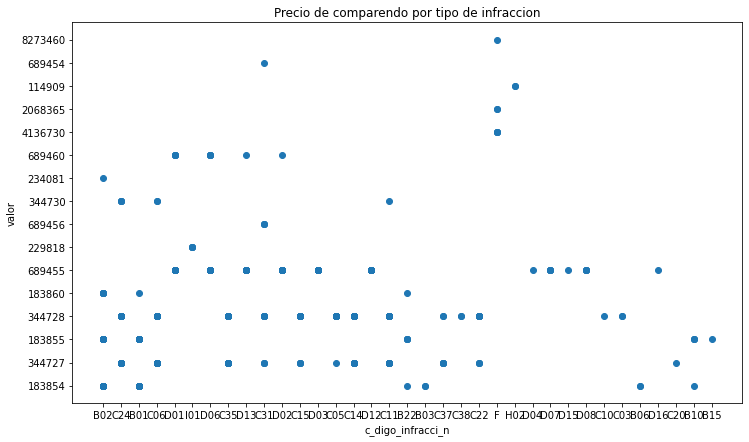

In [184]:
plt.scatter(resultados['c_digo'], resultados['valor'])
plt.xlabel('c_digo')

plt.show()

**My own example 40**

Diagrama de torta de tipo de vehiculo


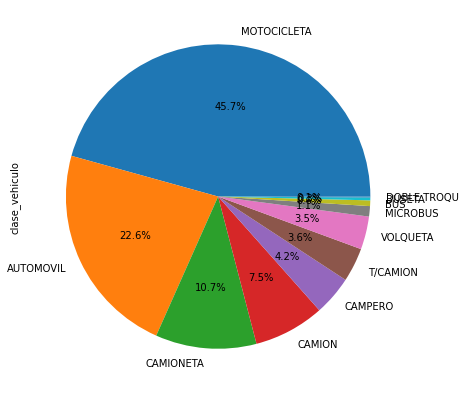

In [185]:
v= resultados.clase_vehiculo.value_counts()
v.plot.pie(autopct = '%1.1f%%')
print("Diagrama de torta de tipo ")

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!